Activity 2 - Modeling Intelligent Agents

*   Wealth Transfer Model



In [15]:
import agentpy as ap
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

class WealthAgent(ap.Agent):

    """ An agent with wealth """

    def setup(self):
        self.wealth = 1
        self.internal_states = {'action_count': 0, 'wealth_history': []}

    def see(self):
        # The agent observes its own wealth
        return {'wealth': self.wealth}

    def next(self, neighbors):
        # The agent selects a random neighbor as a partner for wealth transfer
        partner = self.model.agents.random()
        return partner

    def action(self, partner):
        # The agent performs the wealth transfer action
        if self.wealth > 0:
            partner.wealth += 1
            self.wealth -= 1
            self.internal_states['action_count'] += 1

def gini(x):
    """ Calculate Gini Coefficient """
    x = np.array(x)
    mad = np.abs(np.subtract.outer(x, x)).mean()  # Mean absolute difference
    rmad = mad / np.mean(x)  # Relative mean absolute difference
    return 0.5 * rmad

class WealthModel(ap.Model):

    """ A simple model of random wealth transfers """

    def setup(self):
        self.agents = ap.AgentList(self, self.p.agents, WealthAgent)

    def step(self):
        for agent in self.agents:
            partner = agent.next(self.agents)  # Each agent selects a partner
            agent.action(partner)  # Perform the wealth transfer action

    def update(self):
        # Calculate Gini coefficient and record it at the model level
        gini_coefficient = gini(self.agents.wealth)
        self.record('Gini Coefficient', gini_coefficient)

    def utility(self):
        # A utility function to access the internal states of agents
        action_counts = [agent.internal_states['action_count'] for agent in self.agents]
        wealth_history = [agent.internal_states['wealth_history'] for agent in self.agents]
        return {
            'action_counts': action_counts,
            'wealth_history': wealth_history,
        }

    def plot_agent_utilities(self):
        agent_utility = self.utility()
        action_counts = agent_utility['action_counts']

        plt.figure(figsize=(10, 5))
        plt.hist(action_counts, bins=range(0, max(action_counts) + 1), alpha=0.7)
        plt.title('Agent Action Counts')
        plt.xlabel('Action Count')
        plt.ylabel('Number of Agents')
        plt.show()

parameters = {
    'agents': 100,
    'steps': 100,
    'seed': 42,
}

model = WealthModel(parameters)
results = model.run()

# Access agent utility function and internal states
agent_utility = model.utility()

#Access the action counts of agents
action_counts = agent_utility['action_counts']
print("Action Counts of Agents:", action_counts)


Completed: 100 steps
Run time: 0:00:00.133011
Simulation finished
Action Counts of Agents: [54, 64, 51, 64, 62, 74, 68, 73, 61, 67, 71, 83, 70, 76, 61, 73, 73, 79, 55, 76, 76, 68, 76, 47, 60, 62, 60, 65, 80, 62, 79, 69, 55, 66, 69, 73, 69, 63, 68, 64, 68, 63, 63, 60, 55, 64, 70, 64, 67, 72, 64, 53, 69, 75, 64, 60, 74, 69, 87, 53, 74, 64, 64, 64, 74, 63, 55, 64, 79, 65, 84, 68, 66, 78, 68, 73, 72, 60, 75, 55, 69, 71, 73, 69, 78, 61, 72, 74, 88, 76, 74, 52, 64, 67, 65, 70, 69, 63, 82, 70]


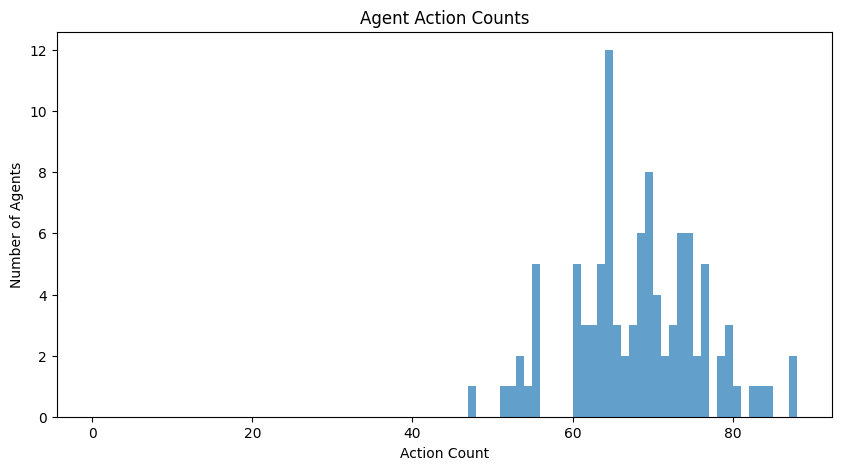

In [16]:
model.plot_agent_utilities()